#Transfer Learning with TensorFlow Part 2: Fine-Tuning


##Creating helper function

importing the helper_function.py which has all the functions used previously


In [1]:
!wget https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py

--2023-01-14 06:53:36--  https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-14 06:53:37 (82.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
#Import helper function

from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## Lets get some data

gona use the pretrained models in tf.keras.applications and apply them to our problem(reg food)

In [3]:
#Get 10% of training data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-01-14 06:56:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  41.7MB/s    in 4.5s    

2023-01-14 06:56:53 (36.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
#check how many images and subdirectories in the dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [5]:
#Create training and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [6]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = #Chetest_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
#Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#see an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.00000000e+01 2.00000000e+00 2.29591817e-01]
   [9.38265324e+00 4.38265276e+00 1.38265300e+00]
   [9.14285755e+00 4.14285755e+00 1.28571439e+00]
   ...
   [1.90943619e+02 1.81515091e+02 1.76300827e+02]
   [1.88658356e+02 1.85137970e+02 1.80469604e+02]
   [2.14219498e+02 2.14760345e+02 2.08989929e+02]]

  [[1.14744911e+01 6.47449112e+00 3.47449064e+00]
   [9.85714340e+00 4.85714340e+00 1.85714340e+00]
   [1.06581631e+01 6.08673429e+00 2.65816259e+00]
   ...
   [1.95719299e+02 1.86290771e+02 1.81474426e+02]
   [1.94459305e+02 1.91602188e+02 1.86602188e+02]
   [2.19571747e+02 2.20571747e+02 2.15571747e+02]]

  [[8.98979568e+00 4.20408154e+00 1.20408154e+00]
   [9.00000000e+00 4.21428585e+00 1.21428585e+00]
   [9.61734676e+00 5.83163261e+00 2.40306091e+00]
   ...
   [1.88494949e+02 1.78494949e+02 1.77663345e+02]
   [1.97372437e+02 1.92459229e+02 1.90015335e+02]
   [1.99775558e+02 1.99132736e+02 1.97132736e+02]]

  ...

  [[1.00000000e+00 3.00000000e+00 0.00000000e+00]
   [1


## Model 0: Building a transfer learning model using the Keras Functional API

The sequential API is straight forward, it runs layers in sequential order
But functional api gives more flexibility with models

In [15]:
# create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze base model
base_model.trainable = False

#3. create inputs into model
inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")

#4. If using ResNet50V2 we need to normalize inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model : {x.shape}")

#6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#8.combine the input and output into a model
model_0 = tf.keras.Model(inputs,outputs)

#9.compile for the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 experiment_name="10_percent_feature_extraction")])

Shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230114-072243
Epoch 1/5
24/24 [==============================] - 19s 271ms/step - loss: 1.8689 - accuracy: 0.4200 - val_loss: 1.3023 - val_accuracy: 0.6727
Epoch 2/5
24/24 [==============================] - 4s 154ms/step - loss: 1.0979 - accuracy: 0.7507 - val_loss: 0.8683 - val_accuracy: 0.8273
Epoch 3/5
24/24 [==============================] - 5s 187ms/step - loss: 0.7886 - accuracy: 0.8147 - val_loss: 0.7217 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 5s 186ms/step - loss: 0.6411 - accuracy: 0.8547 - val_loss: 0.6219 - val_accuracy: 0.8520
Epoch 5/5
24/24 [==============================] - 5s 186ms/step - loss: 0.5401 - accuracy: 0.8840 - val_loss: 0.5556 - val_accuracy: 0.8651


In [16]:
#EValuate on full test data
model_0.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.5550 - accuracy: 0.8628


[0.554986298084259, 0.8628000020980835]

In [17]:
#Check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_4
1 rescaling_3
2 normalization_3
3 tf.math.truediv_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_ac

In [19]:
#Summary of base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_3[0][0]']            
 )                              3)                                                   

In [20]:
#Summary of whole model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


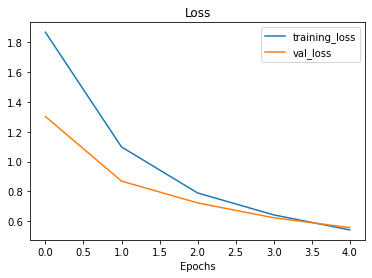

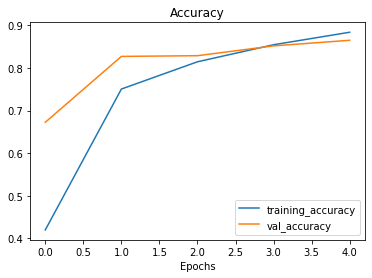

In [21]:
#Check out models training curves
plot_loss_curves(history_0)